In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter

# Codificacao binaria
XBinario = np.array([
    0, 0,
    0, 1,
    1, 0,
    1, 1
]).reshape(4, 2)

# Codificacao bipolar
XBipolar = np.array([
    -1, -1,
    -1, 1,
    1, -1,
    1, 1
]).reshape(4, 2)

y = np.array([-1, 1, 1, -1]).reshape(4,)
print(y)
# Taxa de aprendizagem
rs = np.array([.05, .25, .5, 1., 2.])
# Momentum
alphas = np.array([0., .5, 1., ])

[-1  1  1 -1]


In [8]:
def runNeuralNet (X, y, _activation, _shuffle, _max_iter=10000, plots=True, r=0.001, alpha=0):
    lastLoss = 10
    while lastLoss > .1:
        mlp = MLPClassifier(
                                solver='sgd',
                                shuffle=_shuffle,
                                activation=_activation,
                                max_iter=_max_iter,
                                tol=1e-10,
                                hidden_layer_sizes=(2,),
                                momentum=alpha,
                                learning_rate_init=r,
                                verbose=False)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)
    
    if plots:
        # Plot - curva de a perda
        losses = mlp.loss_curve_
        plt.plot(losses)
        plt.title("Loss (r = " + str(r) + ", alpha = " + str(alpha) + ")")
        plt.show()
        
        # Plot - matriz de confusao
        # fig = plot_confusion_matrix(mlp, X, y, display_labels=[0, 1])
        # fig.figure_.suptitle("Matriz de confusao")
        # plt.show()
        
        # Plot - regiao de decisao
        step = .01
        
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
        
        Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
        Z = Z.reshape(xx.shape)
        plt.imshow(Z, cmap=plt.cm.hot)
        plt.axis('off')
        #plt.plot(X[:, 0]*len(xx), X[:, 1]*len(yy), '.')
        plt.show()
    return mlp

Score:  1.0
Number of iterations:  381965
Loss:  0.002838294300158386


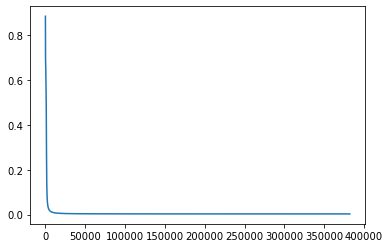

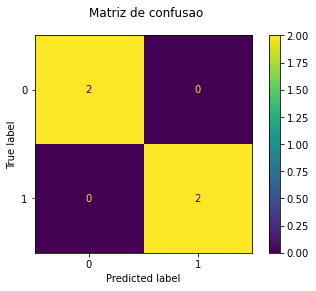

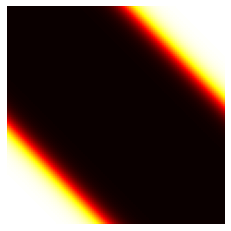

In [3]:
runNeuralNet(X=XBipolar, y=y, _activation='tanh', _shuffle=True, _max_iter=1000000, plots=True, r=0.05)

In [4]:
# Primeiras tabelas

workbook = xlsxwriter.Workbook("PrimeirasTabelas.xlsx")
worksheet = workbook.add_worksheet()

worksheet.write(0, 0, "r = 0.05")
worksheet.write(0, 1, "r = 0.25")
worksheet.write(0, 2, "r = 0.5")
worksheet.write(0, 3, "r = 1")
worksheet.write(0, 4, "r = 2")

cX = 0
cY = 1

for alpha in alphas:
    print("----- Momentum: ", alpha, " -----")
    cX = 0
    for r in rs:
        print("----- " + str(r) + " -----")
        column = []
        for i in range(15):
            print("-- " + str(i) + " --")
            numberIter = runNeuralNet(X=XBipolar, y=y, _activation='tanh', _shuffle=False, _max_iter=1000000, plots=False, r=r, alpha=alpha)
            column.append(numberIter)
        worksheet.write_column(cY, cX, column)
        cX += 1
    cY += 16

workbook.close()


----- Momentum:  0.0  -----
----- 0.05 -----
-- 0 --
Score:  1.0
Number of iterations:  306651
Loss:  0.0022918589617354807
-- 1 --
Score:  1.0
Number of iterations:  308355
Loss:  0.0022919924927215386
-- 2 --
Score:  1.0
Number of iterations:  305032
Loss:  0.0022917468188872166
-- 3 --
Score:  1.0
Number of iterations:  304451
Loss:  0.0022917027131643584
-- 4 --
Score:  1.0
Number of iterations:  305531
Loss:  0.002291785648011343
-- 5 --
Score:  1.0
Number of iterations:  305142
Loss:  0.002291761029532021
-- 6 --
Score:  1.0
Number of iterations:  305767
Loss:  0.002291814447751762
-- 7 --
Score:  1.0
Number of iterations:  306832
Loss:  0.002291865687774766
-- 8 --
Score:  1.0
Number of iterations:  305712
Loss:  0.0022918062124876173
-- 9 --
Score:  1.0
Number of iterations:  306286
Loss:  0.002291826869308345
-- 10 --
Score:  1.0
Number of iterations:  305552
Loss:  0.0022917899344176086
-- 11 --
Score:  1.0
Number of iterations:  306278
Loss:  0.0022918352810604075
-- 12 --
S

In [5]:
# Ordem de apresentacao aleatoria

workbook = xlsxwriter.Workbook("OrdemAleatoria.xlsx")
worksheet = workbook.add_worksheet()

worksheet.write(0, 0, "r = 0.05")
worksheet.write(0, 1, "r = 0.25")
worksheet.write(0, 2, "r = 0.5")
worksheet.write(0, 3, "r = 1")
worksheet.write(0, 4, "r = 2")

ccX = 0

for r in rs:
    print("----- " + str(r) + " -----")
    column = []
    for i in range(15):
        numberIter = runNeuralNet(X=XBipolar, y=y, _activation='tanh', _shuffle=True, _max_iter=1000000, plots=False, r=r, alpha=1)
        column.append(numberIter)
    worksheet.write_column(1, ccX, column)
    ccX += 1

workbook.close()

----- 0.05 -----
Score:  1.0
Number of iterations:  94
Loss:  0.003545734338584138
Score:  1.0
Number of iterations:  125
Loss:  0.0054420181703223386
Score:  1.0
Number of iterations:  93
Loss:  0.003454514498487825
Score:  1.0
Number of iterations:  129
Loss:  0.0060502010038754085
Score:  1.0
Number of iterations:  115
Loss:  0.00770177096618177
Score:  1.0
Number of iterations:  94
Loss:  0.003374081578131897
Score:  1.0
Number of iterations:  95
Loss:  0.003573046443085823
Score:  1.0
Number of iterations:  103
Loss:  0.0042192328988406415
Score:  1.0
Number of iterations:  112
Loss:  0.0055769850929836195
Score:  1.0
Number of iterations:  115
Loss:  0.004060613821774594
Score:  1.0
Number of iterations:  97
Loss:  0.003985290294213788
Score:  1.0
Number of iterations:  103
Loss:  0.0036464737674582618
Score:  1.0
Number of iterations:  163
Loss:  0.00885653334511843
Score:  1.0
Number of iterations:  102
Loss:  0.0039286239067872104
Score:  1.0
Number of iterations:  110
Loss:  

In [6]:
# Codificacao Binaria
workbook = xlsxwriter.Workbook("CodificacaoBinaria.xlsx")
worksheet = workbook.add_worksheet()

worksheet.write(0, 0, "r = 0.05")
worksheet.write(0, 1, "r = 0.25")
worksheet.write(0, 2, "r = 0.5")
worksheet.write(0, 3, "r = 1")
worksheet.write(0, 4, "r = 2")

cX = 0
for r in rs:
    print("----- " + str(r) + " -----")
    column = []
    for i in range(15):
        numberIter = runNeuralNet(X=XBinario, y=np.array([0, 1, 1, 0]).reshape(4,), _activation='relu', _shuffle=True, _max_iter=1000000, plots=False, r=r, alpha=1)
        column.append(numberIter)
    worksheet.write_column(1, cX, column)
    cX += 1

workbook.close()

----- 0.05 -----
Score:  1.0
Number of iterations:  116
Loss:  0.004314146816545912
Score:  1.0
Number of iterations:  110
Loss:  0.003632163767704218
Score:  1.0
Number of iterations:  125
Loss:  0.0042073077205153
Score:  1.0
Number of iterations:  132
Loss:  0.00319829092518778
Score:  1.0
Number of iterations:  118
Loss:  0.005190932611645069
Score:  1.0
Number of iterations:  98
Loss:  0.0026880477125125904
Score:  1.0
Number of iterations:  126
Loss:  0.005480749022170876
Score:  1.0
Number of iterations:  149
Loss:  0.006813003844056375
Score:  1.0
Number of iterations:  99
Loss:  0.0027666159044046775
Score:  1.0
Number of iterations:  115
Loss:  0.004078310552599086
Score:  1.0
Number of iterations:  123
Loss:  0.006183815735628233
Score:  1.0
Number of iterations:  102
Loss:  0.002445321281312619
Score:  1.0
Number of iterations:  155
Loss:  0.0039610668160317
Score:  1.0
Number of iterations:  88
Loss:  0.0024457708085351996
Score:  1.0
Number of iterations:  98
Loss:  0.003

----- Momentum:  0.0  -----
----- 0.05 -----
Score:  1.0
Number of iterations:  304957
Loss:  0.0022917466752856368
----- Momentum:  0.5  -----
----- 0.05 -----
Score:  1.0
Number of iterations:  183111
Loss:  0.002287557211242985
----- Momentum:  1.0  -----
----- 0.05 -----
Score:  1.0
Number of iterations:  111
Loss:  0.007387392448643659


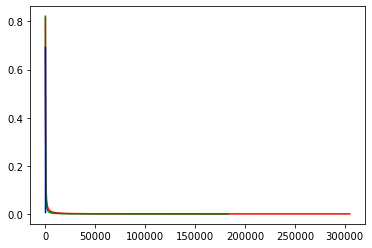

In [12]:
rs = [0.05]
clors = ['r', 'g', 'b']
cc = 0
for alpha in alphas:
    print("----- Momentum: ", alpha, " -----")
    for r in rs:
        print("----- " + str(r) + " -----")
        a = runNeuralNet(X=XBipolar, y=y, _activation='tanh', _shuffle=False, _max_iter=1000000, plots=False, r=r, alpha=alpha)
        plt.plot(a.loss_curve_, color=clors[cc])
    cc += 1

plt.show()